In [1]:
import numpy as np
import pandas as pd
import re


In [4]:
df=pd.read_csv('SMS-Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100243 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100243 non-null  object
 1   id             100243 non-null  object
 2   updateAt       100243 non-null  object
 3   senderAddress  100243 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [7]:
df.shape

(100243, 5)

In [104]:
df.sample(10)

,phoneNumber,id,updateAt,senderAddress,text,Transaction Type,Amount,Payment Method
99937,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-JIOINF,ਸ਼ਹੀਦੀ ਦਿਵਸ ਦੇ ਮੌਕੇ ਤੇ ਸ਼ਹੀਦਾਂ ਨੁੰ ਕੋਟ ਕੋਟ ਪ੍ਰਣਾ...,None,NaN,Other
48653,xx17054730,29740414-9029-41ea-b015-a54207b781bd,"Wed, 11 May 2022 09:50:29 UTC",TX-SFXRDR,<#> Shadowfax Id is 155168216 6gW4yAjEoWG,None,NaN,Other
75750,xx14311304,b0255d7b-cb4e-4c52-af40-3c89807ebfdb,"Tue, 3 May 2022 18:22:56 UTC",918284897924,"Dear Customer, You have 2 missed calls from +9...",None,NaN,Other
8639,xx90595970,82dfbac6-ae55-425a-9cfa-0551a3bb309f,"Thu, 12 May 2022 05:45:22 UTC",+917596950630,Hmmm.sabdhe jao,None,NaN,Other
94558,xx05407636,0d3e8d42-8a13-46d1-bb0d-27a4cd02f991,"Tue, 10 May 2022 07:44:31 UTC",JE-JIOINF,आपके जियो नंबर 8960566568 का प्लान ख़त्म हो चुक...,None,NaN,Other
73581,xx07558929,f5c670b3-88c3-40fc-bc21-3a139d58ed51,"Wed, 4 May 2022 13:10:15 UTC",JM-ICICIB,ICICI Bank Acct XX224 debited for Rs 970.00 on...,credited,970.0,UPI
6734,xx83505567,3cdd08c5-649c-4df6-a58e-06e84c3146dc,"Wed, 4 May 2022 10:39:17 UTC",919306431630,"Dear Customer, +919306431630 is now available ...",None,NaN,Other
3423,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Wed, 4 May 2022 08:57:58 UTC",+918708754713,"Dear Customer, You have 2 missed calls from +9...",None,NaN,Other
16996,xx69382284,7dd75191-1d5e-4946-a09e-d9b118f5ffa7,"Wed, 4 May 2022 10:51:47 UTC",AX-SFXRDR,<#> Shadowfax Id is 143030819 6gW4yAjEoWG,None,NaN,Other
67312,xx79004549,980b7e48-6e68-495b-a0ab-96a4035da9ef,"Tue, 10 May 2022 04:54:24 UTC",TX-SFXRDR,<#> Shadowfax Id is 150205831 6gW4yAjEoWG,None,NaN,Other


In [10]:
df.duplicated().sum()

16960

In [13]:
filtered_rows = df[
    # Messages that contain financial transaction terms
    df['text'].str.contains(r'(debited|credited)', na=False, case=False, regex=True) &
    # Messages that have account-specific or monetary-related terms
    df['text'].str.contains(r'(A/c|account|card|Bal|Transaction ID|INR|Rs\.)', na=False, case=False, regex=True) &
    # Exclude promotional or irrelevant messages
    ~df['text'].str.contains(r'(requested|on approving|will be debited|https?://|freebies|apply now|smytten|placement|scholarship|test|rank|wallet)', na=False, case=False, regex=True)
]


<ipython-input-13-4ddaa0798c36>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['text'].str.contains(r'(debited|credited)', na=False, case=False, regex=True) &
<ipython-input-13-4ddaa0798c36>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['text'].str.contains(r'(A/c|account|card|Bal|Transaction ID|INR|Rs\.)', na=False, case=False, regex=True) &
<ipython-input-13-4ddaa0798c36>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~df['text'].str.contains(r'(requested|on approving|will be debited|https?://|freebies|apply now|smytten|placement|scholarship|test|rank|wallet)', na=False, case=False, regex=True)


In [105]:
filtered_rows

,phoneNumber,id,updateAt,senderAddress,text
53,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...
59,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...
60,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@paytm linked to Indian Ban...
70,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@ybl linked to Indian Bank ...
73,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...
...,...,...,...,...,...
99810,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 200.00 debited from a/c **1060 o...
99812,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 5.00 debited from a/c **1060 on ...
99815,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AD-HDFCBK,HDFC Bank: Rs. 2.00 credited to a/c XXXXXX1060...
99883,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JM-RELONE,"Dear Customer, \nYou are now eligible for 20% ..."


In [106]:
# # prompt: i want to print the rows which has has the keyword=rummy in the text column in filtered_rows

# import numpy as np
# import pandas as pd
# import re
# from google.colab import files

# files.upload()
# df=pd.read_csv('SMS-Data.csv')
# df.info()
# df.shape
# df.sample(10)
# df.duplicated().sum()
# filtered_rows = df[
#     # Messages that contain financial transaction terms
#     df['text'].str.contains(r'(debited|credited)', na=False, case=False, regex=True) &
#     # Messages that have account-specific or monetary-related terms
#     df['text'].str.contains(r'(A/c|account|card|Bal|Transaction ID|INR|Rs\.)', na=False, case=False, regex=True) &
#     # Exclude promotional or irrelevant messages
#     ~df['text'].str.contains(r'(requested|on approving|will be debited|https?://|freebies|apply now|smytten|placement|scholarship|test|rank|wallet)', na=False, case=False, regex=True)
# ]

# Filter rows containing "rummy" in the 'text' column
rummy_rows = filtered_rows[filtered_rows['text'].str.contains('rummy', na=False, case=False)]

# Print the filtered rows
rummy_rows

,phoneNumber,id,updateAt,senderAddress,text
15917,xx52580389,e7faec54-eb66-4d24-b286-601b3896d70e,"Fri, 6 May 2022 11:53:07 UTC",+918160091011,Rs.5500 Bonus can be credited in your rummy ac...
16095,xx52580389,e7faec54-eb66-4d24-b286-601b3896d70e,"Fri, 6 May 2022 11:53:07 UTC",+917990830395,"Dear 63525803XX,\nRs.5500 Bonus can be credite..."
32897,xx83655400,d2c1e3ba-f9b5-4fe8-863a-409d9d559916,"Tue, 10 May 2022 10:14:39 UTC",+916351133479,Rs.5500 Bonus can be credited in your rummy ac...
37176,xx94541847,e7b1667a-fb63-4aee-94d8-ab6877aeebff,"Wed, 11 May 2022 14:04:40 UTC",+917701995048,Rs.5500 Bonus can be credited in your rummy ac...
43352,xx66303163,8503da59-bb3c-4c04-b2b2-9e7da6721ca8,"Sat, 7 May 2022 11:57:48 UTC",AX-POCKET,POCKET52: Rs. 50 has been credited to your a/c...
...,...,...,...,...,...
65237,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Thu, 12 May 2022 03:09:49 UTC",JM-RMYTME,Payment Alert: your payment of Rs 500 at Rummy...
65239,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Thu, 12 May 2022 03:09:49 UTC",JM-RMYTME,Payment Alert: your payment of Rs 500 at Rummy...
65241,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Thu, 12 May 2022 03:09:49 UTC",JM-RMYTME,Payment Alert: your payment of Rs 500 at Rummy...
65242,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Thu, 12 May 2022 03:09:49 UTC",JM-RMYTME,Payment Alert: your payment of Rs 500 at Rummy...


In [16]:
import pandas as pd
import re

# Improved regex to handle UPI transactions and other formats
amount_pattern = r'(?:Rs\.?|INR|debited by)\s?([\d,]+\.?\d*)'

# Safely process the 'text' column to avoid errors with non-string values
df['Transaction Type'] = df['text'].apply(
    lambda x: 'credited' if isinstance(x, str) and 'credited' in x.lower() else
              ('debited' if isinstance(x, str) and 'debited' in x.lower() else None)
)

# Extract amounts only from rows where 'text' is a string
df['Amount'] = df['text'].apply(
    lambda x: re.search(amount_pattern, x).group(1).replace(',', '') if isinstance(x, str) and re.search(amount_pattern, x) else None
)

# Convert the extracted amount to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Create a new column for Payment Method
def extract_payment_method(text):
    if isinstance(text, str):
        text_upper = text.upper()
        if 'NEFT' in text_upper:
            return 'NEFT'
        elif 'UPI' in text_upper:
            return 'UPI'
        elif 'IMPS' in text_upper:
            return 'IMPS'
        elif 'RTGS' in text_upper:
            return 'RTGS'
        elif 'CARD' in text_upper:
            return 'Card'
    return 'Other'

df['Payment Method'] = df['text'].apply(extract_payment_method)

# Filter rows with financial transactions
financial_transactions = df[df['Transaction Type'].notnull()]

# Print rows with missing amounts (if any)
missing_amounts = financial_transactions[financial_transactions['Amount'].isnull()]
if not missing_amounts.empty:
    print("Rows with missing amounts:")
    print(missing_amounts)

# Print relevant columns for financial transactions
print(financial_transactions[['text', 'Transaction Type', 'Amount', 'Payment Method']])


Rows with missing amounts:
       phoneNumber                                    id  \
856     xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
2879    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
4049    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4145    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4211    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
...            ...                                   ...   
98837   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
99162   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
99883   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
99924   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100188  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                            updateAt senderAddress  \
856     Tue, 3 May 2022 08:53:39 UTC     JZ-RELONE   
2879    Wed, 4 May 2022 08:57:58 UTC     JZ-RELONE   
4049    Thu, 5 May 2022 13:48:42 UTC     BP-UNIONB   
4145    Thu, 5 May 2022 13:48:42 UTC

In [17]:
financial_transactions

,phoneNumber,id,updateAt,senderAddress,text,Transaction Type,Amount,Payment Method
53,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,299.0,UPI
59,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,100.0,UPI
60,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@paytm linked to Indian Ban...,credited,20.0,UPI
70,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@ybl linked to Indian Bank ...,credited,3500.0,UPI
73,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,40.0,UPI
...,...,...,...,...,...,...,...,...
99812,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 5.00 debited from a/c **1060 on ...,debited,5.0,UPI
99815,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AD-HDFCBK,HDFC Bank: Rs. 2.00 credited to a/c XXXXXX1060...,credited,2.0,UPI
99883,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JM-RELONE,"Dear Customer, \nYou are now eligible for 20% ...",credited,NaN,Other
99924,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-RELONE,"Dear Customer, \nYou are now eligible for 20% ...",credited,NaN,Other


In [18]:
import pandas as pd
import re

# Improved regex to handle UPI transactions and other formats
amount_pattern = r'(?:Rs\.?|INR|debited by)\s?([\d,]+\.?\d*)'

# Define a list of keywords/phrases to exclude promotional messages
promotional_keywords = [
    r'wallet', r'ludo', r'junglee rummy', r'play', r'win', r'game', r'redeem',
    r'https?://', r'bit\.ly', r'cash games', r'win upto', r'credited.*ticket'
]

promotional_pattern = r'|'.join(promotional_keywords)

# Safely process the 'text' column to avoid errors with non-string values
df['Transaction Type'] = df['text'].apply(
    lambda x: 'credited' if isinstance(x, str) and 'credited' in x.lower() else
              ('debited' if isinstance(x, str) and 'debited' in x.lower() else None)
)

# Filter out promotional messages
df = df[~df['text'].str.contains(promotional_pattern, na=False, case=False, regex=True)]

# Extract amounts only from rows where 'text' is a string
df['Amount'] = df['text'].apply(
    lambda x: re.search(amount_pattern, x).group(1).replace(',', '') if isinstance(x, str) and re.search(amount_pattern, x) else None
)

# Convert the extracted amount to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Create a new column for Payment Method
def extract_payment_method(text):
    if isinstance(text, str):
        text_upper = text.upper()
        if 'NEFT' in text_upper:
            return 'NEFT'
        elif 'UPI' in text_upper:
            return 'UPI'
        elif 'IMPS' in text_upper:
            return 'IMPS'
        elif 'RTGS' in text_upper:
            return 'RTGS'
        elif 'CARD' in text_upper:
            return 'Card'
    return 'Other'

df['Payment Method'] = df['text'].apply(extract_payment_method)

# Filter rows with financial transactions
financial_transactions = df[df['Transaction Type'].notnull()]

# Print rows with missing amounts (if any)
missing_amounts = financial_transactions[financial_transactions['Amount'].isnull()]
if not missing_amounts.empty:
    print("Rows with missing amounts:")
    print(missing_amounts)

# Print relevant columns for financial transactions
print(financial_transactions[['text', 'Transaction Type', 'Amount', 'Payment Method']])


Rows with missing amounts:
       phoneNumber                                    id  \
4049    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4145    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4211    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4274    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4302    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
...            ...                                   ...   
96609   xx81767512  15d22b70-7020-480e-a2e5-2d11eb9123c1   
97173   xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
97270   xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
98094   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100188  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                             updateAt senderAddress  \
4049     Thu, 5 May 2022 13:48:42 UTC     BP-UNIONB   
4145     Thu, 5 May 2022 13:48:42 UTC     AD-UNIONB   
4211     Thu, 5 May 2022 13:48:42 UTC     BT-UNIONB   
4274     Thu, 5 May 2022 13:48:4

<ipython-input-18-165acd2d1712>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['text'].apply(
<ipython-input-18-165acd2d1712>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
<ipython-input-18-165acd2d1712>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [19]:
financial_transactions

,phoneNumber,id,updateAt,senderAddress,text,Transaction Type,Amount,Payment Method
53,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,299.0,UPI
59,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,100.0,UPI
60,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@paytm linked to Indian Ban...,credited,20.0,UPI
70,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@ybl linked to Indian Bank ...,credited,3500.0,UPI
73,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,40.0,UPI
...,...,...,...,...,...,...,...,...
99807,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AX-HDFCBK,HDFC Bank: Rs 300.00 debited from a/c **1060 o...,debited,300.0,UPI
99810,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 200.00 debited from a/c **1060 o...,debited,200.0,UPI
99812,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 5.00 debited from a/c **1060 on ...,debited,5.0,UPI
99815,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AD-HDFCBK,HDFC Bank: Rs. 2.00 credited to a/c XXXXXX1060...,credited,2.0,UPI


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_financial_transactions(financial_transactions):
    """
    Analyze financial transaction data from SMS records
    """
    # Create a copy to avoid modifying original
    df = financial_transactions.copy()

    # Print a sample date to verify format
    print("Sample date format:", df['updateAt'].iloc[0])

    # Convert updateAt to datetime with the correct format for abbreviated month
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Basic transaction statistics
    total_transactions = len(df)
    total_debited = df[df['Transaction Type'] == 'debited']['Amount'].sum()
    total_credited = df[df['Transaction Type'] == 'credited']['Amount'].sum()
    net_balance = total_credited - total_debited

    # Payment method analysis
    payment_method_stats = {
        'count': df['Payment Method'].value_counts().to_dict(),
        'volume': df.groupby('Payment Method')['Amount'].sum().to_dict()
    }

    # Daily transaction patterns
    df['date'] = df['updateAt'].dt.date
    daily_stats = df.groupby('date').agg({
        'Amount': ['count', 'sum'],
        'Transaction Type': lambda x: x.value_counts().to_dict()
    }).to_dict()

    # Transaction size categories
    df['transaction_size'] = pd.cut(df['Amount'],
                                  bins=[0, 100, 500, 1000, 5000, float('inf')],
                                  labels=['<100', '100-500', '500-1000', '1000-5000', '>5000'])
    transaction_size_dist = df.groupby(['Transaction Type', 'transaction_size']).size().to_dict()

    return {
        'summary': {
            'total_transactions': total_transactions,
            'total_debited': total_debited,
            'total_credited': total_credited,
            'net_balance': net_balance,
            'average_transaction': df['Amount'].mean(),
            'median_transaction': df['Amount'].median()
        },
        'payment_methods': payment_method_stats,
        'daily_patterns': daily_stats,
        'transaction_sizes': transaction_size_dist
    }

def plot_transaction_analysis(financial_transactions):
    """
    Create visualizations for transaction analysis
    """
    df = financial_transactions.copy()

    # Convert updateAt to datetime with the correct format
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Set up the plotting style
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15, 10))

    # Plot 1: Payment Method Distribution
    plt.subplot(2, 2, 1)
    payment_counts = df['Payment Method'].value_counts()
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Payment Methods')

    # Plot 2: Transaction Types
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Transaction Type', y='Amount', data=df)
    plt.title('Transaction Amounts by Type')

    # Plot 3: Daily Transaction Volume
    plt.subplot(2, 2, 3)
    df['date'] = df['updateAt'].dt.date
    daily_amounts = df.groupby('date')['Amount'].sum()
    plt.plot(daily_amounts.index, daily_amounts.values)
    plt.title('Daily Transaction Volume')
    plt.xticks(rotation=45)

    # Plot 4: Payment Method Amount Distribution
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Payment Method', y='Amount', data=df)
    plt.title('Amount Distribution by Payment Method')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig

def generate_insights_report(financial_transactions):
    """
    Generate a comprehensive report of transaction insights
    """
    # Print first few rows of data to verify structure
    print("\nFirst few rows of data:")
    print(financial_transactions.head(2))

    analysis = analyze_financial_transactions(financial_transactions)

    report = f"""Financial Transaction Analysis Report

Summary Statistics:
- Total Transactions: {analysis['summary']['total_transactions']}
- Total Debited: ₹{analysis['summary']['total_debited']:,.2f}
- Total Credited: ₹{analysis['summary']['total_credited']:,.2f}
- Net Balance: ₹{analysis['summary']['net_balance']:,.2f}
- Average Transaction: ₹{analysis['summary']['average_transaction']:,.2f}
- Median Transaction: ₹{analysis['summary']['median_transaction']:,.2f}

Payment Method Distribution:
Transaction Count by Method:
{pd.Series(analysis['payment_methods']['count']).to_string()}

Transaction Volume by Method:
{pd.Series(analysis['payment_methods']['volume']).to_string()}
"""
    return report

# Let's try to debug the date format
print("\nTrying alternative date parsing approaches...")
try:
    insights = generate_insights_report(financial_transactions)
    print(insights)
except ValueError as e:
    print(f"Error: {e}")
    # Try parsing with a more flexible approach
    print("\nAttempting flexible date parsing...")
    financial_transactions['updateAt'] = pd.to_datetime(financial_transactions['updateAt'], format='mixed')
    insights = generate_insights_report(financial_transactions)
    print(insights)


Trying alternative date parsing approaches...

First few rows of data:
   phoneNumber                                    id  \
53  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
59  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   

                        updateAt senderAddress  \
53  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   
59  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   

                                                 text Transaction Type  \
53  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   
59  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   

    Amount Payment Method  
53   299.0            UPI  
59   100.0            UPI  
Sample date format: Tue, 3 May 2022 08:53:39 UTC
Financial Transaction Analysis Report

Summary Statistics:
- Total Transactions: 11066
- Total Debited: ₹15,724,399.59
- Total Credited: ₹24,789,993.34
- Net Balance: ₹9,065,593.75
- Average Transaction: ₹3,746.82
- Median Transaction: ₹179.00

Payment

<ipython-input-34-1de5a3442edd>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_size_dist = df.groupby(['Transaction Type', 'transaction_size']).size().to_dict()


In [86]:
insights = generate_insights_report(financial_transactions)
print(insights)


First few rows of data:
   phoneNumber                                    id  \
53  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
59  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   

                        updateAt senderAddress  \
53  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   
59  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   

                                                 text Transaction Type  \
53  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   
59  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   

    Amount Payment Method  
53   299.0            UPI  
59   100.0            UPI  
Sample date format: Tue, 3 May 2022 08:53:39 UTC
Financial Transaction Analysis Report

Summary Statistics:
- Total Transactions: 10289
- Total Debited: ₹15,472,458.71
- Total Credited: ₹9,020,183.61
- Net Balance: ₹-6,452,275.10
- Average Transaction: ₹2,429.83
- Median Transaction: ₹166.03

Payment Method Distribution:
Transaction Count by Meth

<ipython-input-77-1de5a3442edd>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_size_dist = df.groupby(['Transaction Type', 'transaction_size']).size().to_dict()


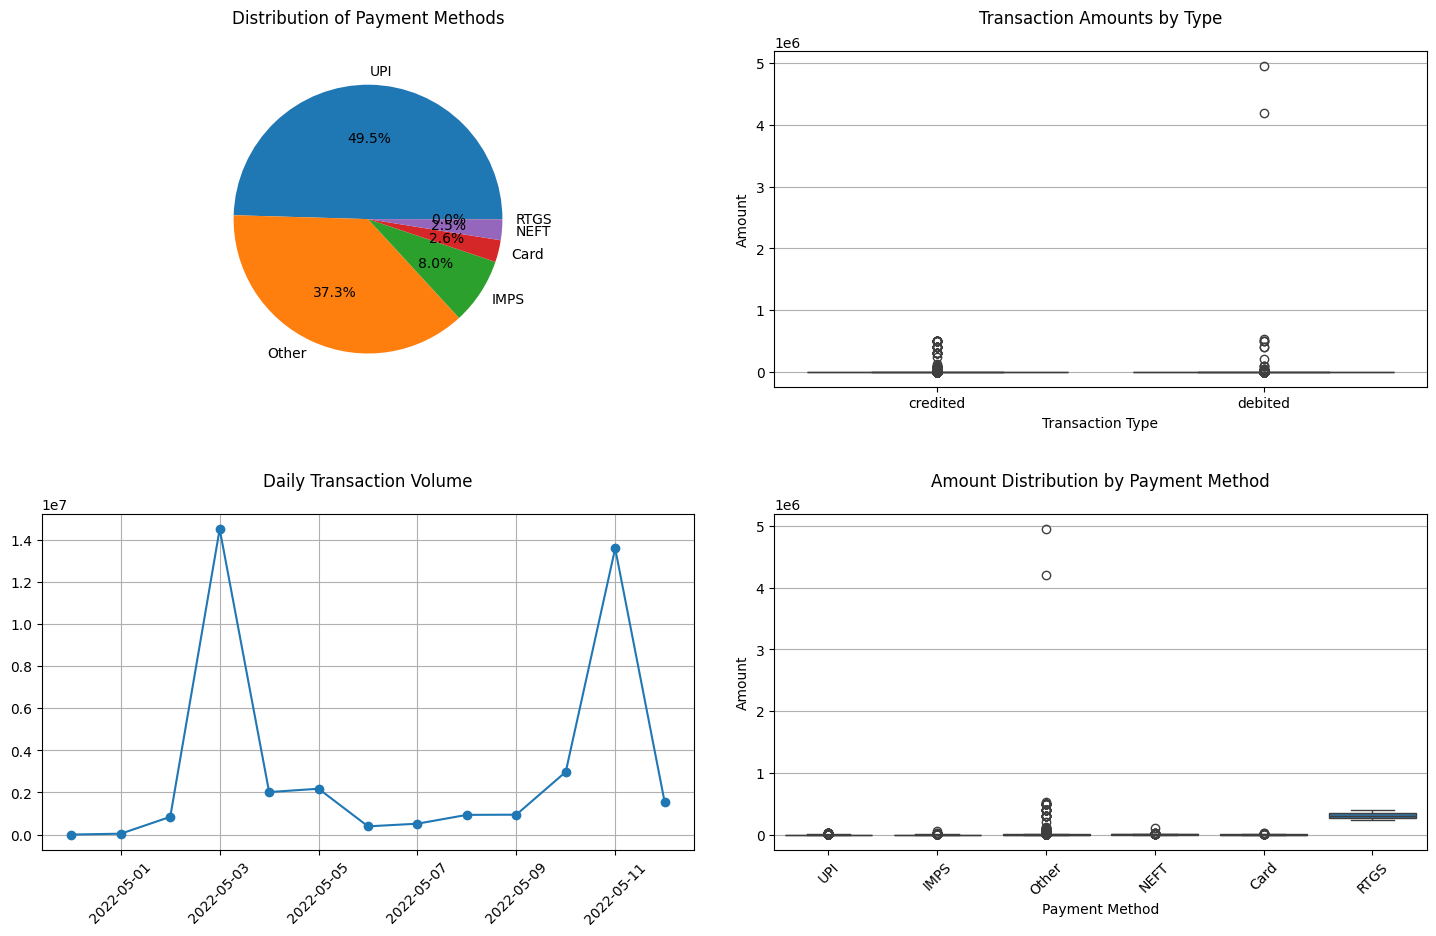

In [33]:
def plot_transaction_analysis(financial_transactions):
    """
    Create visualizations for transaction analysis

    Parameters:
    financial_transactions (pandas.DataFrame): DataFrame containing transaction data
    """
    df = financial_transactions.copy()

    # Convert updateAt to datetime with the correct format
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Create figure with a clean style
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['axes.grid'] = True
    fig = plt.figure()

    # Plot 1: Payment Method Distribution
    plt.subplot(2, 2, 1)
    payment_counts = df['Payment Method'].value_counts()
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Payment Methods', pad=20)

    # Plot 2: Transaction Types
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Transaction Type', y='Amount', data=df)
    plt.title('Transaction Amounts by Type', pad=20)

    # Plot 3: Daily Transaction Volume
    plt.subplot(2, 2, 3)
    df['date'] = df['updateAt'].dt.date
    daily_amounts = df.groupby('date')['Amount'].sum()
    plt.plot(daily_amounts.index, daily_amounts.values, marker='o')
    plt.title('Daily Transaction Volume', pad=20)
    plt.xticks(rotation=45)

    # Plot 4: Payment Method Amount Distribution
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Payment Method', y='Amount', data=df)
    plt.title('Amount Distribution by Payment Method', pad=20)
    plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=3.0)
    return fig

# Run the visualization
try:
    fig = plot_transaction_analysis(financial_transactions)
    plt.show()
except Exception as e:
    print(f"Error in visualization: {str(e)}")
    print("\nTrying to display individual plots...")

    # Attempt to display plots individually if combined view fails
    df = financial_transactions.copy()
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Individual plots
    plt.figure(figsize=(8, 6))
    payment_counts = df['Payment Method'].value_counts()
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Payment Methods')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Transaction Type', y='Amount', data=df)
    plt.title('Transaction Amounts by Type')
    plt.show()

In [89]:
import pandas as pd
import re

# Improved regex to handle UPI transactions and other formats
# amount_pattern = r'(?:Rs\.?|INR|debited by)\s?([\d,]+\.?\d*)'
amount_pattern = r'(?:Rs\.?|INR|debited by|debited by|Credited for Rs:|credited by RS\.)\s?(\d+(?:,\d{3})*(?:\.\d{1,2})?)'

# Define patterns to exclude promotional and non-legit messages
promotional_keywords = [
    r'wallet', r'ludo', r'junglee rummy', r'play', r'win', r'game', r'redeem',
    r'https?://', r'bit\.ly', r'cash games', r'win upto', r'credited.*ticket',
    r'check now', r'register now',r'requested', r'on approving', r'will be debited', r'freebies', r'apply now',
    r'smytten', r'placement', r'scholarship', r'test', r'rank', r'wallet',r'was not completed',r'Submit Your Details',r'Register',r'rummy',r'DATA coupon'
    r'can be credited'
]
promotional_pattern = r'|'.join(promotional_keywords)

# Define function to extract payment methods
def extract_payment_method(text):
    if isinstance(text, str):
        text_upper = text.upper()
        if 'NEFT' in text_upper:
            return 'NEFT'
        elif 'UPI' in text_upper:
            return 'UPI'
        elif 'IMPS' in text_upper:
            return 'IMPS'
        elif 'RTGS' in text_upper:
            return 'RTGS'
        elif 'CARD' in text_upper:
            return 'Card'
        elif 'DEPOSIT OF CASH AT' in text_upper:
            return 'Bank Deposit'  # Update this category
    return 'Other'

# Process the 'Transaction Type' column
df['Transaction Type'] = df['text'].apply(
    lambda x: 'credited' if isinstance(x, str) and 'credited' in x.lower() else
              ('debited' if isinstance(x, str) and 'debited' in x.lower() else None)
)

# Filter out promotional messages
df = df[~df['text'].str.contains(promotional_pattern, na=False, case=False, regex=True)]

# Extract amounts from rows where 'text' is a string
df['Amount'] = df['text'].apply(
    lambda x: re.search(amount_pattern, x).group(1).replace(',', '') if isinstance(x, str) and re.search(amount_pattern, x) else None
)

# Convert the extracted amount to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Extract payment methods
df['Payment Method'] = df['text'].apply(extract_payment_method)

# Filter rows with valid financial transactions
financial_transactions = df[df['Transaction Type'].notnull()]

# Print rows with missing amounts (if any)
missing_amounts = financial_transactions[financial_transactions['Amount'].isnull()]
if not missing_amounts.empty:
    print("Rows with missing amounts:")
    print(missing_amounts)

# Print relevant columns for financial transactions
print(financial_transactions[['text', 'Transaction Type', 'Amount', 'Payment Method']])


Rows with missing amounts:
       phoneNumber                                    id  \
4145    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4211    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4302    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4333    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
4346    xx81424237  043c058f-8c4e-4d3b-804b-ac07058ceee9   
...            ...                                   ...   
94842   xx05407636  0d3e8d42-8a13-46d1-bb0d-27a4cd02f991   
97173   xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
97270   xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
98094   xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100188  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                             updateAt senderAddress  \
4145     Thu, 5 May 2022 13:48:42 UTC     AD-UNIONB   
4211     Thu, 5 May 2022 13:48:42 UTC     BT-UNIONB   
4302     Thu, 5 May 2022 13:48:42 UTC     JD-UNIONB   
4333     Thu, 5 May 2022 13:48:4

In [90]:
financial_transactions

,phoneNumber,id,updateAt,senderAddress,text,Transaction Type,Amount,Payment Method
53,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,299.0,UPI
59,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,100.0,UPI
60,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@paytm linked to Indian Ban...,credited,20.0,UPI
70,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA 6280368198@ybl linked to Indian Bank ...,credited,3500.0,UPI
73,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",VK-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,credited,40.0,UPI
...,...,...,...,...,...,...,...,...
99807,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AX-HDFCBK,HDFC Bank: Rs 300.00 debited from a/c **1060 o...,debited,300.0,UPI
99810,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 200.00 debited from a/c **1060 o...,debited,200.0,UPI
99812,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-HDFCBK,HDFC Bank: Rs 5.00 debited from a/c **1060 on ...,debited,5.0,UPI
99815,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",AD-HDFCBK,HDFC Bank: Rs. 2.00 credited to a/c XXXXXX1060...,credited,2.0,UPI


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_financial_transactions(financial_transactions):
    """
    Analyze financial transaction data from SMS records
    """
    # Create a copy to avoid modifying original
    df = financial_transactions.copy()

    # Print a sample date to verify format
    print("Sample date format:", df['updateAt'].iloc[0])

    # Convert updateAt to datetime with the correct format for abbreviated month
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Basic transaction statistics
    total_transactions = len(df)
    total_debited = df[df['Transaction Type'] == 'debited']['Amount'].sum()
    total_credited = df[df['Transaction Type'] == 'credited']['Amount'].sum()
    net_balance = total_credited - total_debited

    # Payment method analysis
    payment_method_stats = {
        'count': df['Payment Method'].value_counts().to_dict(),
        'volume': df.groupby('Payment Method')['Amount'].sum().to_dict()
    }

    # Daily transaction patterns
    df['date'] = df['updateAt'].dt.date
    daily_stats = df.groupby('date').agg({
        'Amount': ['count', 'sum'],
        'Transaction Type': lambda x: x.value_counts().to_dict()
    }).to_dict()

    # Transaction size categories
    df['transaction_size'] = pd.cut(df['Amount'],
                                  bins=[0, 100, 500, 1000, 5000, float('inf')],
                                  labels=['<100', '100-500', '500-1000', '1000-5000', '>5000'])
    transaction_size_dist = df.groupby(['Transaction Type', 'transaction_size']).size().to_dict()

    return {
        'summary': {
            'total_transactions': total_transactions,
            'total_debited': total_debited,
            'total_credited': total_credited,
            'net_balance': net_balance,
            'average_transaction': df['Amount'].mean(),
            'median_transaction': df['Amount'].median()
        },
        'payment_methods': payment_method_stats,
        'daily_patterns': daily_stats,
        'transaction_sizes': transaction_size_dist
    }

def plot_transaction_analysis(financial_transactions):
    """
    Create visualizations for transaction analysis
    """
    df = financial_transactions.copy()

    # Convert updateAt to datetime with the correct format
    df['updateAt'] = pd.to_datetime(df['updateAt'], format='%a, %d %b %Y %H:%M:%S %Z')

    # Set up the plotting style
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15, 10))

    # Plot 1: Payment Method Distribution
    plt.subplot(2, 2, 1)
    payment_counts = df['Payment Method'].value_counts()
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Payment Methods')

    # Plot 2: Transaction Types
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Transaction Type', y='Amount', data=df)
    plt.title('Transaction Amounts by Type')

    # Plot 3: Daily Transaction Volume
    plt.subplot(2, 2, 3)
    df['date'] = df['updateAt'].dt.date
    daily_amounts = df.groupby('date')['Amount'].sum()
    plt.plot(daily_amounts.index, daily_amounts.values)
    plt.title('Daily Transaction Volume')
    plt.xticks(rotation=45)

    # Plot 4: Payment Method Amount Distribution
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Payment Method', y='Amount', data=df)
    plt.title('Amount Distribution by Payment Method')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig

def generate_insights_report(financial_transactions):
    """
    Generate a comprehensive report of transaction insights
    """
    # Print first few rows of data to verify structure
    print("\nFirst few rows of data:")
    print(financial_transactions.head(2))

    analysis = analyze_financial_transactions(financial_transactions)

    report = f"""Financial Transaction Analysis Report

Summary Statistics:
- Total Transactions: {analysis['summary']['total_transactions']}
- Total Debited: ₹{analysis['summary']['total_debited']:,.2f}
- Total Credited: ₹{analysis['summary']['total_credited']:,.2f}
- Net Balance: ₹{analysis['summary']['net_balance']:,.2f}
- Average Transaction: ₹{analysis['summary']['average_transaction']:,.2f}
- Median Transaction: ₹{analysis['summary']['median_transaction']:,.2f}

Payment Method Distribution:
Transaction Count by Method:
{pd.Series(analysis['payment_methods']['count']).to_string()}

Transaction Volume by Method:
{pd.Series(analysis['payment_methods']['volume']).to_string()}
"""
    return report

# Let's try to debug the date format
print("\nTrying alternative date parsing approaches...")
try:
    insights = generate_insights_report(financial_transactions)
    print(insights)
except ValueError as e:
    print(f"Error: {e}")
    # Try parsing with a more flexible approach
    print("\nAttempting flexible date parsing...")
    financial_transactions['updateAt'] = pd.to_datetime(financial_transactions['updateAt'], format='mixed')
    insights = generate_insights_report(financial_transactions)
    print(insights)


Trying alternative date parsing approaches...

First few rows of data:
   phoneNumber                                    id  \
53  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
59  xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   

                        updateAt senderAddress  \
53  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   
59  Tue, 3 May 2022 08:53:39 UTC     VM-IndBnk   

                                                 text Transaction Type  \
53  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   
59  Your VPA sanju39chd@okaxis linked to Indian Ba...         credited   

    Amount Payment Method  
53   299.0            UPI  
59   100.0            UPI  
Sample date format: Tue, 3 May 2022 08:53:39 UTC
Financial Transaction Analysis Report

Summary Statistics:
- Total Transactions: 10243
- Total Debited: ₹3,091,671.71
- Total Credited: ₹6,384,653.25
- Net Balance: ₹3,292,981.54
- Average Transaction: ₹931.61
- Median Transaction: ₹162.00

Payment Met

<ipython-input-96-1de5a3442edd>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_size_dist = df.groupby(['Transaction Type', 'transaction_size']).size().to_dict()


In [78]:
# Filter and display messages where Payment Method is "Other" from financial_transactions
other_payment_method_messages = financial_transactions[financial_transactions['Payment Method'] == 'Other']
print("Messages with Payment Method as 'Other':")
print(other_payment_method_messages[['text', 'Payment Method']].to_string(index=False))

# Filter and display messages that contain "MyVodafoneApp" from financial_transactions
# vodafone_app_messages = financial_transactions[financial_transactions['text'].str.contains("MyVodafoneApp", na=False, case=False)]
# print("\nMessages containing 'MyVodafoneApp':")
# print(vodafone_app_messages[['text', 'Payment Method']].to_string(index=False))


Messages with Payment Method as 'Other':
                                                                                                                                                                                                                                                                                                                                 text Payment Method
                                                                                                                                                                                              Your A/c XXX1824658  is credited by Rs. 6,000 Total Bal : Rs. 7,020.35 CR  Clr Bal : Rs. 7,020.35 CR as on:13/04/2022 13:18 -IndianBank          Other
                                                                                                                                                                                               Your A/c XXX1824658 is credited by Rs. 6,000 Total Bal : Rs. 6,747.91 CR  Clr Bal : Rs

In [91]:
# Filter messages where Amount is NaN
missing_amount_messages = financial_transactions[financial_transactions['Amount'].isna()]

# Print the messages with missing Amount in table format
print("Messages with missing amounts (Amount = NaN):")
print(missing_amount_messages[['text', 'Transaction Type', 'Amount', 'Payment Method']].to_string(index=False))


Messages with missing amounts (Amount = NaN):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    text Transaction Type  Amount Payment Method
                                                                                                                                                                                                                                                                                                                                                                                         Your SB A/c *9571 Credited for Rs:.75 on 29-04-2

In [94]:
financial_transactions.shape

(10243, 8)

In [100]:
financial_transactions.sample(40)

,phoneNumber,id,updateAt,senderAddress,text,Transaction Type,Amount,Payment Method
78961,xx71874144,ec848166-bf8a-4c3e-a3d2-6080d55ecbf0,"Tue, 10 May 2022 12:51:44 UTC",AX-HDFCBK,UPDATE: Your A/c XX8541 credited with INR 30.0...,credited,30.00,IMPS
16018,xx52580389,e7faec54-eb66-4d24-b286-601b3896d70e,"Fri, 6 May 2022 11:53:07 UTC",VK-SBIUPI,Rs200.0 debited@SBI UPI frm A/cX8764 on 02Nov2...,debited,200.00,UPI
60903,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Wed, 11 May 2022 04:28:51 UTC",BG-CANBNK,"An amount of INR 2,000.00 has been DEBITED to ...",debited,2000.00,Other
75240,xx07558929,f5c670b3-88c3-40fc-bc21-3a139d58ed51,"Wed, 4 May 2022 13:10:15 UTC",JX-CENTBK,A/c 3XXXXX7722 debited by Rs. 47 Total Bal: Rs...,debited,47.00,Card
58468,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Tue, 10 May 2022 07:31:34 UTC",BG-CANBNK,"An amount of INR 1,000.00 has been CREDITED to...",credited,1000.00,Other
41569,xx08602357,b5e250b8-d2d0-4376-9562-6362d4c683ec,"Mon, 2 May 2022 00:49:41 UTC",VD-BOBSMS,Your VPA manishhsinghbist2357@okhdfcbank linke...,credited,20.00,UPI
45714,xx66303163,8503da59-bb3c-4c04-b2b2-9e7da6721ca8,"Sat, 7 May 2022 14:44:27 UTC",VK-SBIPSG,"Dear Customer, INR 8,000.00 credited to your A...",credited,8000.00,NEFT
51552,xx52892129,65f95d9e-85ae-439f-836e-3bc5218ec9ca,"Thu, 5 May 2022 19:23:48 UTC",BT-CANBNK,An amount of INR 200.00 has been CREDITED to y...,credited,200.00,Other
48067,xx17054730,29740414-9029-41ea-b015-a54207b781bd,"Tue, 10 May 2022 07:24:02 UTC",BP-BOBTXN,Rs.26 Credited to A/c ...2397 thru UPI/2067102...,credited,26.00,UPI
46332,xx10044463,2013df6a-2f7c-43b7-b105-3a177c069dac,"Wed, 11 May 2022 04:26:20 UTC",VM-KOTAKB,Rs.4000.00 is credited in your Kotak Bank a/c ...,credited,4000.00,UPI


In [101]:
financial_transactions.to_csv('financial_transactions.csv', index=False)

In [102]:
from google.colab import files
files.download('financial_transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>